In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl

exchange='WIKI'
ticker='AMZN'

stock = quandl.get('%s/%s' % (exchange, ticker),api_key='xCpdYQzqjxgooYJ7zisz')

In [2]:
stock.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


In [3]:
data=stock.copy()
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


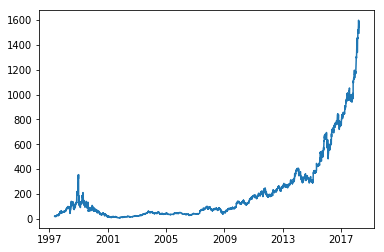

In [4]:
max_date=max(data.index)
end_date=max_date-pd.DateOffset(years=1)
start_date=end_date-pd.DateOffset(years=3)
plt.plot(data['Close'])
plt.show()

In [5]:
train=data[(data.index>start_date)]
test=data[(data.index>end_date)]

In [38]:
import urllib2 
import csv
import numpy as np
from sklearn import svm 
from sklearn.metrics import *
import matplotlib.pyplot as plt
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure import *
from pybrain.datasets import *
from pybrain.structure.modules import *
def svm_rbf(feature, label_list):

    length_feature = len(feature)
    len_train = int(0.75*length_feature)
    train_feature = feature[0: len_train]
    test_feature = feature[len_train: ]

    train_label = label_list[0:len_train]
    test_label = label_list[len_train:]


    clf = svm.SVC(C=100000,kernel='rbf')
    clf.fit(train_feature, train_label)
    predicted = clf.predict(test_feature)
    print "Accuracy: ", accuracy_score(predicted, test_label)*100, "%"
    print "Precision Score :", precision_score(predicted, test_label)*100, "%"
    print "Recall Score :" ,recall_score(predicted, test_label)*100, "%"
    return predicted, test_label, train_feature, train_label, test_feature


def  plotting_svm(predicted, test_labels,clr):
    plt.ylabel('Actual Values')
    plt.plot( test_labels,color=clr)
    plt.show()
    plt.xlabel('minutes')
    plt.ylabel('Predicted Values')
    plt.plot( predicted,color=clr)
    
    plt.show()


def neural_networks(train_feature, train_label, test_features, test_labels):
    net = buildNetwork(len(train_feature[0]), 30, 1, hiddenclass = TanhLayer, outclass = TanhLayer,recurrent = True)
    ds = ClassificationDataSet(len(train_feature[0]), 1)
    for i, j in zip(train_feature, train_label):
        ds.addSample(i, j)
    trainer = BackpropTrainer(net, ds)
    epochs = 13
    for i in range(epochs):
        trainer.train()
    predicted = list()
    for i in test_features:
        predicted.append(int(net.activate(i)>0.5))
    predicted = np.array(predicted)

    print "Accuracy:", accuracy_score(test_labels, predicted)*100, "%"
    return predicted

def creating_binary_labels(close_list, open_price_list):
    label_list = close_list - open_price_list
    label_list = label_list[1:-1]

    for i in range(len(label_list)):
        if(label_list[i]>0):
            label_list[i]=1
        else:
            label_list[i]=0
    return label_list


def fearure_creation(data):
    #Initialising
    timestamp_list=data.index.values
    close_list=data['Adj. Close']
    high_list=data['Adj. High']
    low_list=data['Adj. Low']
    open_price_list=data['Adj. Open']
    volume_list=data['Adj. Volume']
    split_ratio=data['Split Ratio']
    open_change_percentage_list=[]
    close_change_percentage_list=[]
    low_change_percentage_list=[]
    high_change_percentage_list=[]
    volume_change_percentage_list=[]    
    volume_diff_percentage_list=[]
    open_diff_percentage_list=[]
    Open_price_moving_average_list=[]
    Close_price_moving_average_list=[]
    High_price_moving_average_list=[]
    Low_price_moving_average_list=[]


    highest_open_price = open_price_list[0]
    lowest_open_price = open_price_list[0]
    highest_volume = volume_list[0]
    lowest_volume = volume_list[0]
    #if(x>len(open_price_list)):
    x = len(open_price_list)
    for i in range(len(close_list)-x,len(close_list)):
        if(highest_open_price<open_price_list[i]):
            highest_open_price=open_price_list[i]
        if(lowest_open_price>open_price_list[i]):
            lowest_open_price=open_price_list[i]
        if(highest_volume<volume_list[i]):
            highest_volume=volume_list[i]
        if(lowest_volume>volume_list[i]):
            lowest_volume=volume_list[i]


    #Finding change percentage list/difference list
    opensum=open_price_list[0]
    closesum=close_list[0]
    highsum=high_list[0]
    lowsum=low_list[0]
    for i in range(1, len(close_list)-1):
        close_change_percentage = (close_list[i] - close_list[i-1])/close_list[i-1]
        close_change_percentage_list.append(close_change_percentage)
        
        open_change_percentage = (open_price_list[i+1] - open_price_list[i])/open_price_list[i]
        open_change_percentage_list.append(open_change_percentage)

        high_change_percentage = (high_list[i] - high_list[i-1])/high_list[i-1]
        high_change_percentage_list.append(high_change_percentage)
        if volume_list[i-1]==0:
            volume_list[i-1] = volume_list[i-2]

        volume_change_percentage = (volume_list[i] - volume_list[i-1])/volume_list[i-1]
        volume_change_percentage_list.append(volume_change_percentage)

        low_change_percentage = (low_list[i] - low_list[i-1])/low_list[i-1]
        low_change_percentage_list.append(low_change_percentage)


        volume_diff = (volume_list[i] - volume_list[i-1])/(highest_volume-lowest_volume)
        volume_diff_percentage_list.append( volume_diff)

        open_diff = (open_price_list[i+1] - open_price_list[i])/(highest_open_price - lowest_open_price)
        open_diff_percentage_list.append(open_diff)

        opensum+=open_price_list[i]
        closesum+=close_list[i]
        highsum+=high_list[i]
        lowsum+=low_list[i]

        Open_price_moving_average = float(opensum/i+1) / open_price_list[i+1]
        Open_price_moving_average_list.append(Open_price_moving_average)

        High_price_moving_average = float(highsum/i+1) / high_list[i+1]
        High_price_moving_average_list.append(High_price_moving_average)

        Close_price_moving_average = float(closesum/i+1) / close_list[i+1]
        Close_price_moving_average_list.append(Close_price_moving_average)

        Low_price_moving_average = float(lowsum/i+1) / low_list[i+1]
        Low_price_moving_average_list.append(Low_price_moving_average)

            
    
    #Combining features
    close_change_percentage_list = np.array(close_change_percentage_list)
    high_change_percentage_list = np.array(high_change_percentage_list)
    low_change_percentage_list = np.array(low_change_percentage_list)
    volume_change_percentage_list = np.array(volume_change_percentage_list)
    open_price_list = np.array(open_price_list)
    close_list = np.array(close_list)
    open_diff_percentage_list=np.array(open_diff_percentage_list)
    volume_change_percentage_list=np.array(volume_change_percentage_list)
    split_ratio=np.array(split_ratio[1:-1])
    feature1 = np.column_stack((split_ratio,open_change_percentage_list, close_change_percentage_list, high_change_percentage_list, low_change_percentage_list, volume_change_percentage_list))  
    feature2 = np.column_stack((split_ratio,open_change_percentage_list, close_change_percentage_list, high_change_percentage_list, low_change_percentage_list, volume_change_percentage_list, open_diff_percentage_list, volume_diff_percentage_list))  
    feature3 = np.column_stack((split_ratio,open_change_percentage_list, close_change_percentage_list, high_change_percentage_list, low_change_percentage_list, volume_change_percentage_list, Open_price_moving_average_list, Close_price_moving_average_list, High_price_moving_average_list, Low_price_moving_average_list))  
    feature4 = np.column_stack((split_ratio,open_change_percentage_list, close_change_percentage_list, high_change_percentage_list, low_change_percentage_list, volume_change_percentage_list, open_diff_percentage_list, volume_diff_percentage_list,Open_price_moving_average_list, Close_price_moving_average_list, High_price_moving_average_list, Low_price_moving_average_list))
    label_list = creating_binary_labels(close_list,open_price_list)
    return feature1, feature2, feature3, feature4, label_list



-----------------------------------------------------------------------
SVM - RBF Kernel with Features : 
Open Change%, Close Change%, High Change%, Low Change%, Volume Change%
Accuracy:  89.64143426294821 %
Precision Score : 92.56198347107438 %
Recall Score : 86.82170542635659 %
-----------------------------------------------------------------------

-----------------------------------------------------------------------
SVM - RBF Kernel with Features : 
Open Change%, Close Change%, High Change%, Low Change%, Volume Change%,
Open Difference% , Volume Difference%, 
Accuracy:  90.83665338645417 %
Precision Score : 92.56198347107438 %
Recall Score : 88.88888888888889 %
-----------------------------------------------------------------------

-----------------------------------------------------------------------
SVM - RBF Kernel with Features : 
Open Change%, Close Change%, High Change%, Low Change%, Volume Change%,
Open MovingAvg, Close MovingAvg, High MovingAvg, Low MovingAvg
Accuracy:

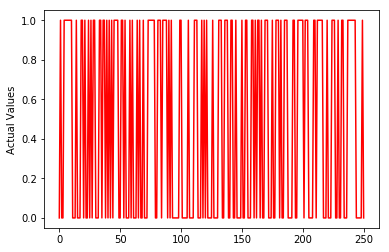

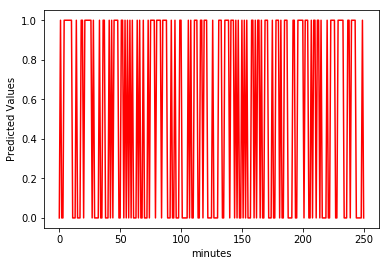

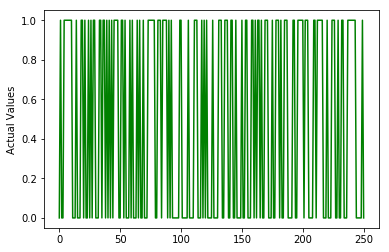

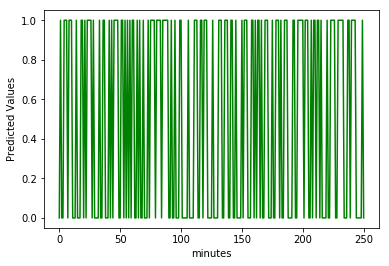

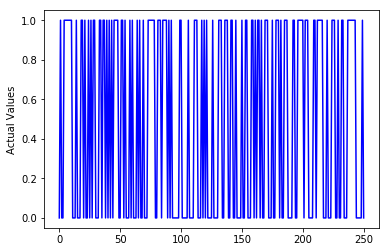

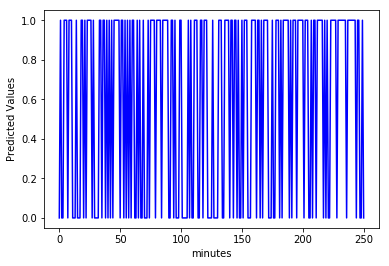

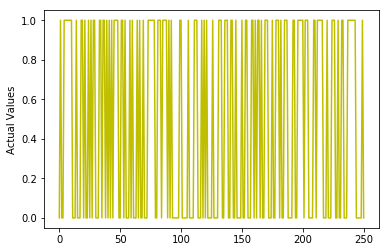

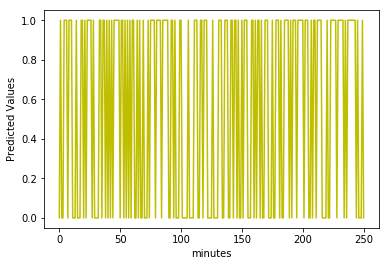


*******************************RNN*************************************

-----------------------------------------------------------------------
Open Change%, Close Change%, High Change%, Low Change%, Volume Change%
Accuracy: 48.20717131474104 %
-----------------------------------------------------------------------

-----------------------------------------------------------------------
Open Change%, Close Change%, High Change%, Low Change%, Volume Change%,
Open Difference% , Volume Difference%, 
Accuracy: 63.745019920318725 %
-----------------------------------------------------------------------

-----------------------------------------------------------------------
Open Change%, Close Change%, High Change%, Low Change%, Volume Change%,
Open MovingAvg, Close MovingAvg, High MovingAvg, Low MovingAvg
Accuracy: 59.36254980079681 %
-----------------------------------------------------------------------

-----------------------------------------------------------------------
Open Chang

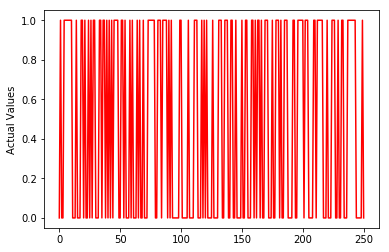

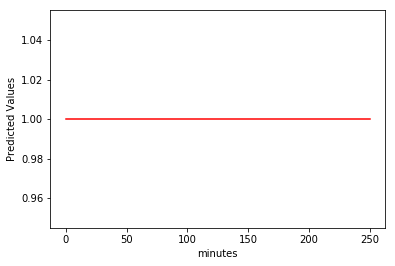

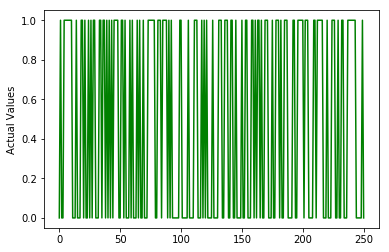

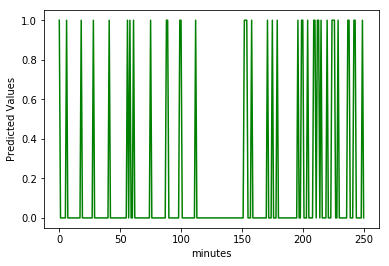

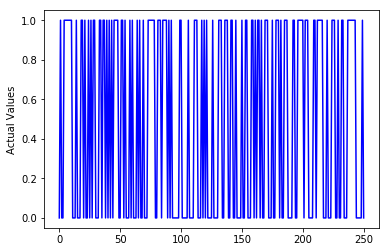

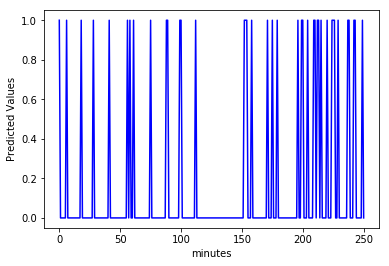

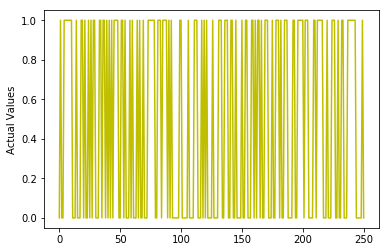

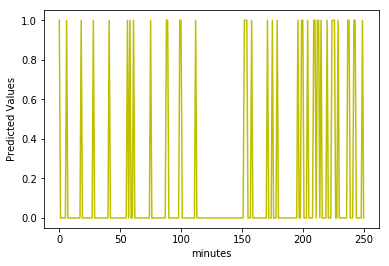

In [40]:
feature1, feature2, feature3, feature4, label_list = fearure_creation(train)
print
print "-----------------------------------------------------------------------"
print "SVM - RBF Kernel with Features : "
print "Open Change%, Close Change%, High Change%, Low Change%, Volume Change%"
predicted1, test_label1, train_feature1, train_label1, test_feature1 = svm_rbf(feature1, label_list)
print "-----------------------------------------------------------------------"


print
print "-----------------------------------------------------------------------"
print "SVM - RBF Kernel with Features : "
print "Open Change%, Close Change%, High Change%, Low Change%, Volume Change%,"
print "Open Difference% , Volume Difference%, "
predicted2, test_label2, train_feature2, train_label2, test_feature2= svm_rbf(feature2, label_list)
print "-----------------------------------------------------------------------"

print
print "-----------------------------------------------------------------------"
print "SVM - RBF Kernel with Features : "
print "Open Change%, Close Change%, High Change%, Low Change%, Volume Change%,"
print "Open MovingAvg, Close MovingAvg, High MovingAvg, Low MovingAvg"
predicted3, test_label3, train_feature3, train_label3, test_feature3= svm_rbf(feature3, label_list)
print "-----------------------------------------------------------------------"


print
print "-----------------------------------------------------------------------"
print "SVM - RBF Kernel with Features : "
print "Open Change%, Close Change%, High Change%, Low Change%, Volume Change%"
print "Open Difference% , Volume Difference%, Open Price Moving Avg"
print "Close Price Moving Avg, High Price Moving Avg, Low Price Moving Avg"
predicted4, test_label4, train_feature4, train_label4, test_feature4 =  svm_rbf(feature4, label_list)
print "-----------------------------------------------------------------------"

plotting_svm(predicted1, test_label1,'r')
plotting_svm(predicted2, test_label2,'g')
plotting_svm(predicted3, test_label3,'b')
plotting_svm(predicted4, test_label4,'y')

print
print "*******************************RNN*************************************"
print
print "-----------------------------------------------------------------------"
#print "SVM - RBF Kernel with Features : "
print "Open Change%, Close Change%, High Change%, Low Change%, Volume Change%"
predicted_NN_1=neural_networks(train_feature1, train_label1, test_feature1, test_label1)
print "-----------------------------------------------------------------------"


print
print "-----------------------------------------------------------------------"
#print "SVM - RBF Kernel with Features : "
print "Open Change%, Close Change%, High Change%, Low Change%, Volume Change%,"
print "Open Difference% , Volume Difference%, "
predicted_NN_2=neural_networks(train_feature2, train_label2, test_feature2, test_label2)
print "-----------------------------------------------------------------------"

print
print "-----------------------------------------------------------------------"
#print "SVM - RBF Kernel with Features : "
print "Open Change%, Close Change%, High Change%, Low Change%, Volume Change%,"
print "Open MovingAvg, Close MovingAvg, High MovingAvg, Low MovingAvg"
predicted_NN_3=neural_networks(train_feature3, train_label3, test_feature3, test_label3)
print "-----------------------------------------------------------------------"

print
print "-----------------------------------------------------------------------"
#print "SVM - RBF Kernel with Features : "
print "Open Change%, Close Change%, High Change%, Low Change%, Volume Change%"
print "Open Difference% , Volume Difference%, Open Price Moving Avg"
print "Close Price Moving Avg, High Price Moving Avg, Low Price Moving Avg"
predicted_NN_4=neural_networks(train_feature4, train_label4, test_feature4, test_label4)
print "-----------------------------------------------------------------------"

plotting_svm(predicted_NN_1, test_label1,'r')
plotting_svm(predicted_NN_2, test_label2,'g')
plotting_svm(predicted_NN_2, test_label3,'b')
plotting_svm(predicted_NN_2, test_label4,'y')
